In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../data/"

In [184]:
#load data

attendance = pd.read_csv(data_path+"attendance.csv")
entity_schedule = pd.read_csv(data_path+"entity_schedule.csv")
link_attraction_park = pd.read_csv(data_path+"link_attraction_park.csv", sep=";")
parade = pd.read_excel(data_path+"parade_night_show.xlsx", index_col="Unnamed: 0")
waiting_times = pd.read_csv(data_path+"waiting_times.csv")
weather_data = pd.read_csv(data_path+"weather_data.csv")

In [242]:
weather_data = pd.read_csv(data_path+"weather_data.csv")

## EDA

### Attendance

In [28]:
attendance.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365


In [185]:
## Filter PortAventura World
df_attendance = attendance[attendance["FACILITY_NAME"] == "PortAventura World"]


In [186]:
# convert USAGE_DATE to datetime data type
df_attendance['USAGE_DATE'] = pd.to_datetime(df_attendance['USAGE_DATE'])
df_attendance

C:\Temp\ipykernel_19836\2732520102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attendance['USAGE_DATE'] = pd.to_datetime(df_attendance['USAGE_DATE'])


,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
2,2018-06-02,PortAventura World,57940
4,2018-06-03,PortAventura World,44365
6,2018-06-04,PortAventura World,37617
8,2018-06-05,PortAventura World,32438
...,...,...,...
2357,2022-07-22,PortAventura World,49586
2359,2022-07-23,PortAventura World,51748
2361,2022-07-24,PortAventura World,45261
2363,2022-07-25,PortAventura World,53764


In [187]:
# check for missing values
print(df_attendance.isnull().sum())

USAGE_DATE       0
FACILITY_NAME    0
attendance       0
dtype: int64


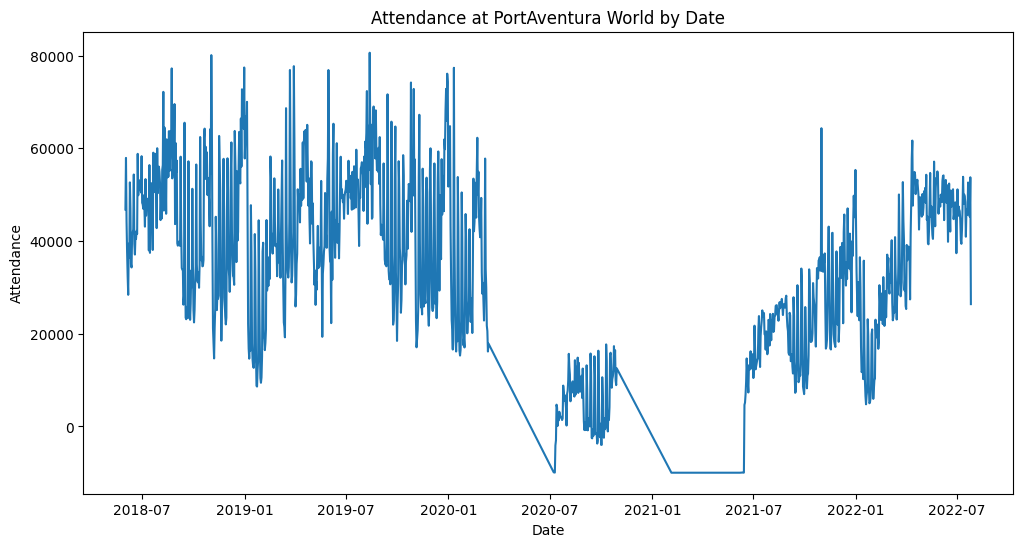

In [188]:
# plot attendance by date
plt.figure(figsize=(12,6))
sns.lineplot(x='USAGE_DATE', y='attendance', data=df_attendance)
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.title('Attendance at PortAventura World by Date')
plt.show()

In [189]:
# compute summary statistics
print(df_attendance['attendance'].describe())

count     1182.000000
mean     34796.605753
std      18325.289439
min      -9991.000000
25%      21701.000000
50%      35672.500000
75%      49563.500000
max      80642.000000
Name: attendance, dtype: float64


In [ ]:
negative_attendance = df_attendance[df_attendance["attendance"] < 0]
print(negative_attendance)

In [191]:
len(negative_attendance)

37

In [193]:
#Drop the negative values
df_attendance = df_attendance[df_attendance['attendance'] >= 0]

## Entity Schedule

In [194]:
entity_schedule.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29


In [195]:
# filter the dataframe to keep only rows with ENTITY_TYPE == "ATR" or (ENTITY_TYPE == "PARK" and ENTITY_DESCRIPTION_SHORT == "PortAventura World")
df_entity_schedule = entity_schedule[(entity_schedule["ENTITY_TYPE"] == "ATTR") | ((entity_schedule["ENTITY_TYPE"] == "PARK") & (entity_schedule["ENTITY_DESCRIPTION_SHORT"] == "PortAventura World"))]

In [ ]:
# convert the columns WORK_DATE, DEB_TIME, and FIN_TIME to datetime data type
df_entity_schedule['WORK_DATE'] = pd.to_datetime(df_entity_schedule['WORK_DATE'])
df_entity_schedule['DEB_TIME'] = pd.to_datetime(df_entity_schedule['DEB_TIME'])
df_entity_schedule['FIN_TIME'] = pd.to_datetime(df_entity_schedule['FIN_TIME'])

In [197]:
# check for missing values
print(df_entity_schedule.isnull().sum())

REF_CLOSING_DESCRIPTION     31971
ENTITY_DESCRIPTION_SHORT        0
ENTITY_TYPE                     0
DEB_TIME                        0
FIN_TIME                        0
UPDATE_TIME                     0
WORK_DATE                       0
dtype: int64


In [198]:
# create a new column "duration" to represent the working hours
df_entity_schedule['duration'] = df_entity_schedule['FIN_TIME'] - df_entity_schedule['DEB_TIME']
df_entity_schedule.head()

C:\Temp\ipykernel_19836\1840366630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entity_schedule['duration'] = df_entity_schedule['FIN_TIME'] - df_entity_schedule['DEB_TIME']


,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,duration
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00,2022-04-07 22:04:00,2022-04-08 08:00:30.000,2022-04-07,0 days 13:34:00
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00,2018-03-28 18:12:00,2018-03-29 08:24:37.000,2018-03-28,0 days 09:35:00
3,NaN,Gondola,ATTR,2019-04-11 09:55:00,2019-04-11 20:19:00,2019-04-12 08:59:29.000,2019-04-11,0 days 10:24:00
4,NaN,Monorail,ATTR,2019-06-29 08:30:00,2019-06-29 20:35:00,2019-06-30 08:14:16.000,2019-06-29,0 days 12:05:00
5,Fermeture Réhab,Top Spin,ATTR,2019-04-07 23:59:00,2019-04-07 23:59:00,2019-04-08 07:40:04.000,2019-04-07,0 days 00:00:00


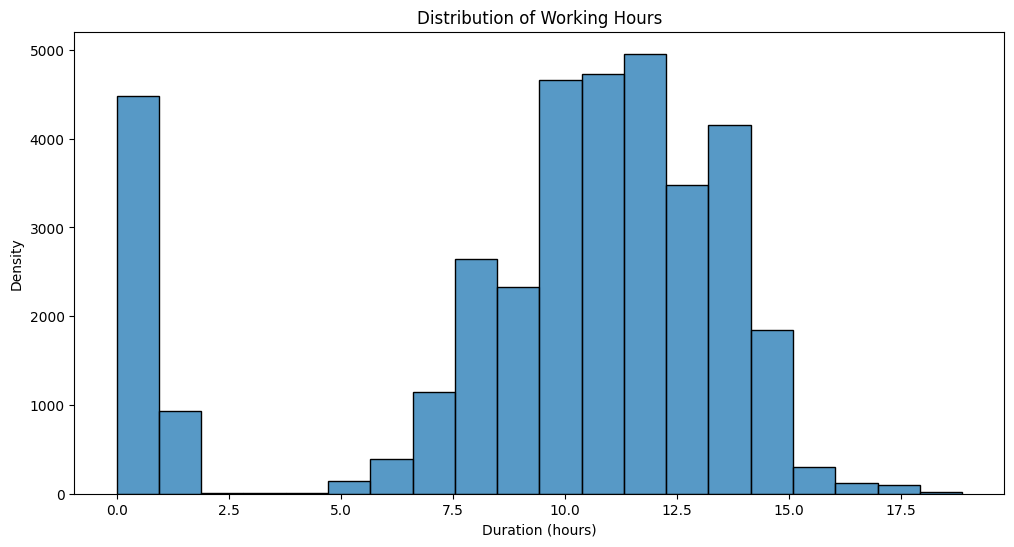

In [199]:
# plot a histogram to show the distribution of working hours
plt.figure(figsize=(12,6))
sns.histplot(df_entity_schedule['duration'].dt.total_seconds() / 3600, bins=20)
plt.xlabel('Duration (hours)')
plt.ylabel('Density')
plt.title('Distribution of Working Hours')
plt.show()

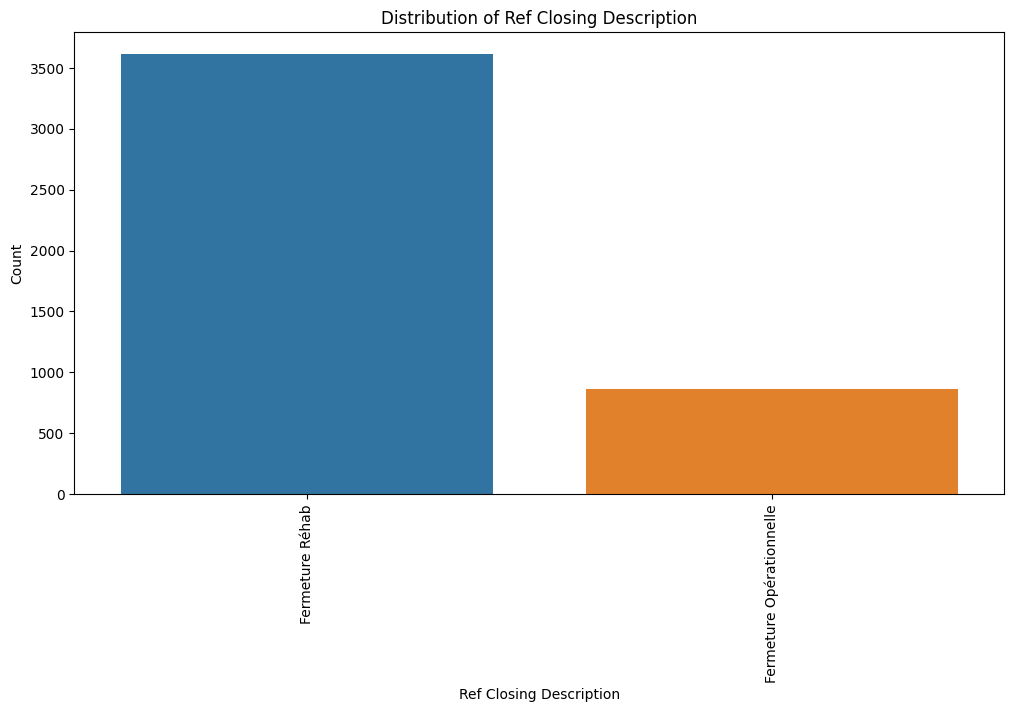

In [200]:
# plot a histogram to show the distribution of REF_CLOSING_DESCRIPTION
plt.figure(figsize=(12,6))
sns.countplot(x='REF_CLOSING_DESCRIPTION', data= df_entity_schedule[~df_entity_schedule['REF_CLOSING_DESCRIPTION'].isna()])
plt.xlabel('Ref Closing Description')
plt.ylabel('Count')
plt.title('Distribution of Ref Closing Description')
plt.xticks(rotation=90)
plt.show()

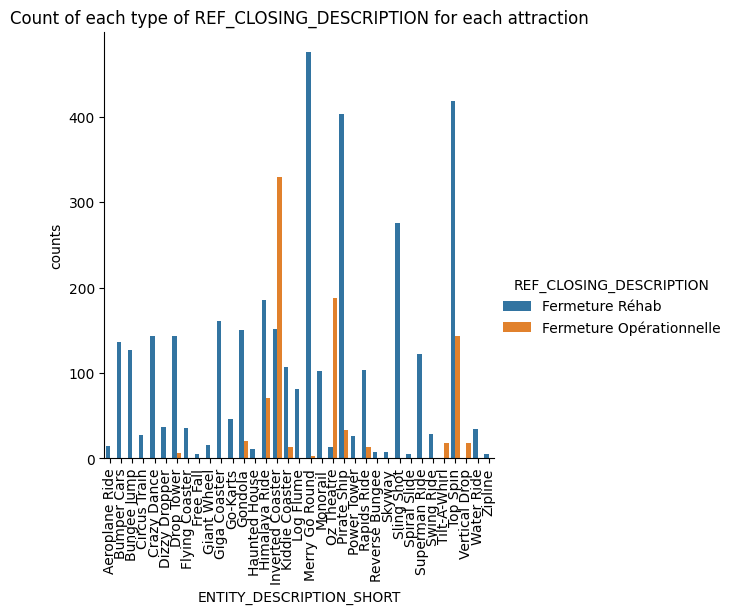

In [201]:
# Filter out rows with NaN values in REF_CLOSING_DESCRIPTION column
entity_schedule_filtered = entity_schedule[entity_schedule['REF_CLOSING_DESCRIPTION'].notna()]

# Plot the count of each type of REF_CLOSING_DESCRIPTION for each attraction
grouped = entity_schedule_filtered.groupby(['ENTITY_DESCRIPTION_SHORT', 'REF_CLOSING_DESCRIPTION']).size().reset_index(name='counts')
sns.catplot(x="ENTITY_DESCRIPTION_SHORT", y="counts", hue="REF_CLOSING_DESCRIPTION", kind="bar", data=grouped)
plt.title("Count of each type of REF_CLOSING_DESCRIPTION for each attraction")
plt.xticks(rotation=90)
plt.show()

In [202]:
# compute summary statistics for the working hours
print(df_entity_schedule['duration'].describe())

count                        36443
mean     0 days 09:31:59.366133413
std      0 days 04:24:39.617321258
min                0 days 00:00:00
25%                0 days 08:15:00
50%                0 days 10:39:00
75%                0 days 12:32:00
max                0 days 18:52:00
Name: duration, dtype: object


### Link Attraction Park

In [203]:
link_attraction_park.head()

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens


In [204]:
# Filter out rows with park != "PortAventura World"
df_link_attraction_park = link_attraction_park[link_attraction_park['PARK'] == "PortAventura World"]


In [205]:
#Number of attractions

len(df_link_attraction_park['ATTRACTION'].unique())

26

### Parade Night Shows

In [206]:
parade.head()

,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-10-01,20:00:00,17:30:00,12:10:00
1,2018-10-02,20:00:00,17:30:00,12:10:00
2,2018-10-03,20:00:00,17:30:00,12:10:00
3,2018-10-04,20:00:00,17:30:00,12:10:00
4,2018-10-05,20:00:00,17:30:00,12:10:00


In [207]:
parade.isnull().sum()

WORK_DATE       0
NIGHT_SHOW      0
PARADE_1        0
PARADE_2      481
dtype: int64

### Waiting Times

In [297]:
waiting_times.shape

(3509324, 14)

In [209]:
# Add PARK from attraction_park_link
merged = waiting_times.merge(link_attraction_park, left_on='ENTITY_DESCRIPTION_SHORT', right_on='ATTRACTION', how='left')
df_waiting_times = merged.drop(['ATTRACTION'], axis=1)


In [210]:
# Filter out rows with park != "PortAventura World"
df_waiting_times = df_waiting_times[df_waiting_times['PARK'] == "PortAventura World"]

df_waiting_times.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,PARK
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,PortAventura World
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,PortAventura World
5,2018-01-01,2018-01-01 18:15:00.000,18,2018-01-01 18:30:00.000,Free Fall,50,3.0,0.0,0.000,0.00,0,0,0,3.0,PortAventura World


In [211]:
# convert the columns WORK_DATE, DEB_TIME, and FIN_TIME to datetime data type
df_waiting_times['WORK_DATE'] = pd.to_datetime(df_waiting_times['WORK_DATE'])
df_waiting_times['DEB_TIME'] = pd.to_datetime(df_waiting_times['DEB_TIME'])
df_waiting_times['FIN_TIME'] = pd.to_datetime(df_waiting_times['FIN_TIME'])

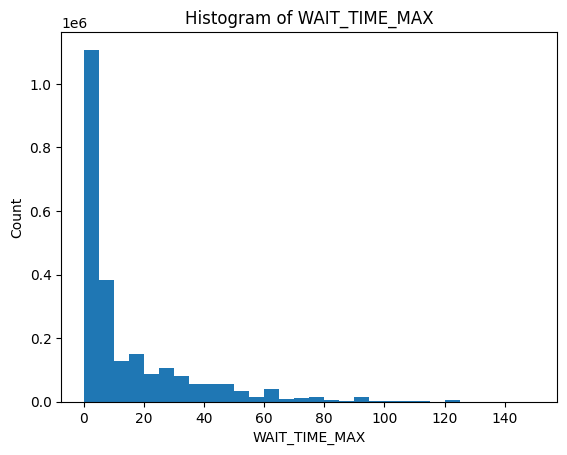

In [212]:
# Plot a histogram of WAIT_TIME_MAX
plt.hist(df_waiting_times['WAIT_TIME_MAX'].dropna(), bins=30, range=(0, 150))
plt.title("Histogram of WAIT_TIME_MAX")
plt.xlabel("WAIT_TIME_MAX")
plt.ylabel("Count")
plt.show()

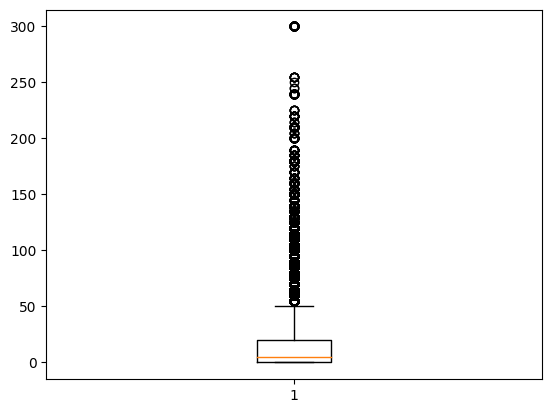

In [213]:
plt.boxplot(df_waiting_times["WAIT_TIME_MAX"])
plt.show()

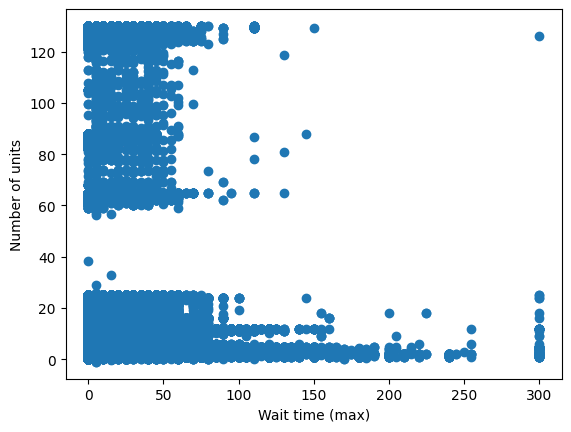

In [214]:
#Plot a scatter plot of wait times and number of units to see the relationship between these two variables
plt.scatter(df_waiting_times["WAIT_TIME_MAX"], df_waiting_times["NB_UNITS"])
plt.xlabel("Wait time (max)")
plt.ylabel("Number of units")
plt.show()

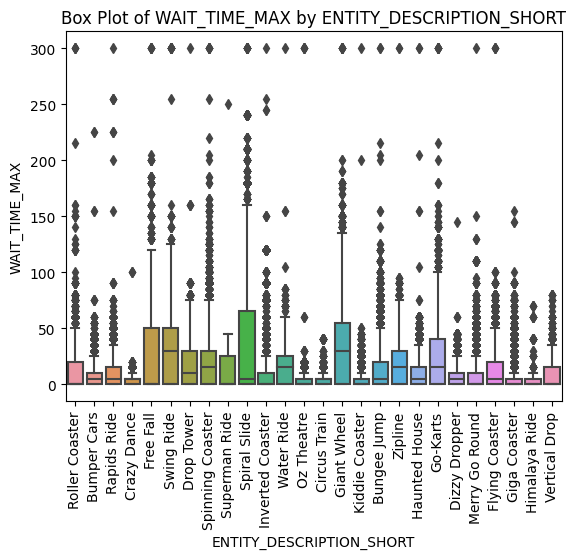

In [215]:
# Plot a box plot of WAIT_TIME_MAX by ENTITY_DESCRIPTION_SHORT
sns.boxplot(x='ENTITY_DESCRIPTION_SHORT', y='WAIT_TIME_MAX', data=df_waiting_times)
plt.title("Box Plot of WAIT_TIME_MAX by ENTITY_DESCRIPTION_SHORT")
plt.xlabel("ENTITY_DESCRIPTION_SHORT")
plt.ylabel("WAIT_TIME_MAX")
plt.xticks(rotation=90)
plt.show()

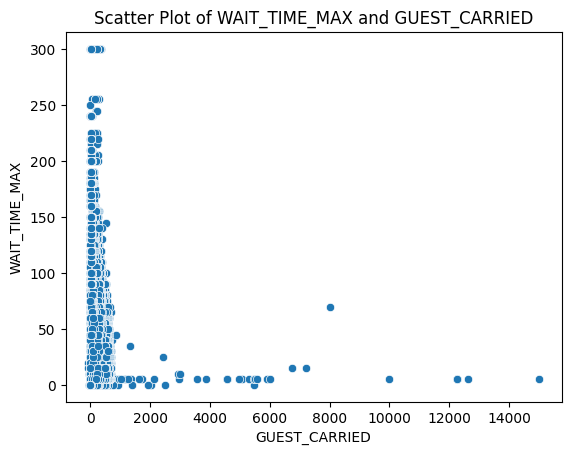

In [216]:
# Plot a scatter plot of WAIT_TIME_MAX and GUEST_CARRIED
sns.scatterplot(x='GUEST_CARRIED', y='WAIT_TIME_MAX', data=df_waiting_times)
plt.title("Scatter Plot of WAIT_TIME_MAX and GUEST_CARRIED")
plt.xlabel("GUEST_CARRIED")
plt.ylabel("WAIT_TIME_MAX")
plt.show()

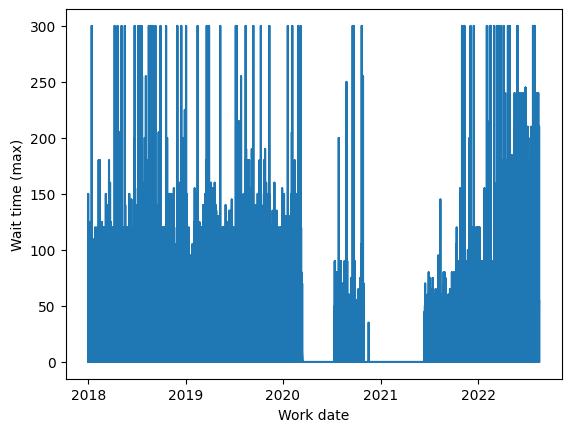

In [217]:
#Over time to see trend
plt.plot(df_waiting_times["WORK_DATE"], df_waiting_times["WAIT_TIME_MAX"])
plt.xlabel("Work date")
plt.ylabel("Wait time (max)")
plt.show()

C:\Temp\ipykernel_19836\3383558203.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  waiting_times_filtered = df_waiting_times[waiting_times['ENTITY_DESCRIPTION_SHORT'] == attraction]


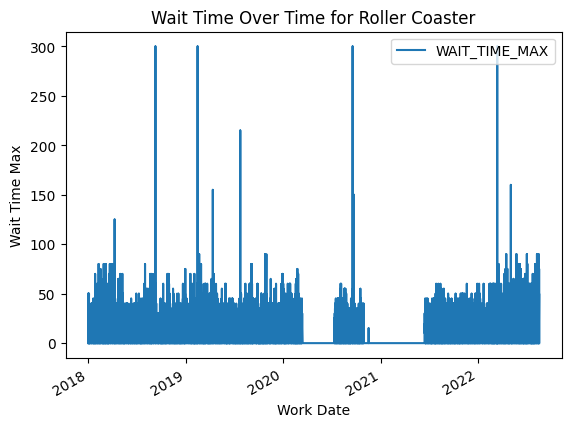

In [218]:
attraction = 'Roller Coaster'
waiting_times_filtered = df_waiting_times[waiting_times['ENTITY_DESCRIPTION_SHORT'] == attraction]

waiting_times_filtered.plot(x='WORK_DATE', y='WAIT_TIME_MAX', kind='line')
plt.xlabel('Work Date')
plt.ylabel('Wait Time Max')
plt.title('Wait Time Over Time for Roller Coaster')
plt.show()


In [219]:
df_waiting_times['FIN_TIME'].min()

Timestamp('2018-01-01 09:15:00')

In [220]:
df_waiting_times['FIN_TIME'].max()

Timestamp('2022-08-18 23:00:00')

In [221]:
# Get summary statistics
df_waiting_times.describe()

,DEB_TIME_HOUR,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
count,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06
mean,1.549998e+01,1.265171e+01,1.051284e+01,8.070589e+01,1.752379e+02,1.549698e+02,8.056178e+00,7.751566e+00,3.046116e-01,1.603548e+01
std,4.031101e+00,1.999859e+01,2.316212e+01,1.156726e+02,2.084763e+02,1.919896e+02,7.442102e+00,7.430967e+00,2.011046e+00,2.890514e+01
min,9.000000e+00,0.000000e+00,-1.000000e+00,-6.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00
25%,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,1.600000e+01,5.000000e+00,2.000000e+00,1.800000e+01,7.500000e+01,7.500000e+01,1.500000e+01,1.500000e+01,0.000000e+00,5.000000e+00
75%,1.900000e+01,2.000000e+01,1.100000e+01,1.380000e+02,3.067500e+02,2.547500e+02,1.500000e+01,1.500000e+01,0.000000e+00,1.600000e+01
max,2.200000e+01,3.000000e+02,1.300000e+02,1.500000e+04,7.560000e+02,7.560000e+02,1.500000e+01,1.500000e+01,3.000000e+01,1.300000e+02


C:\Temp\ipykernel_19836\94608931.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_waiting_times.corr()


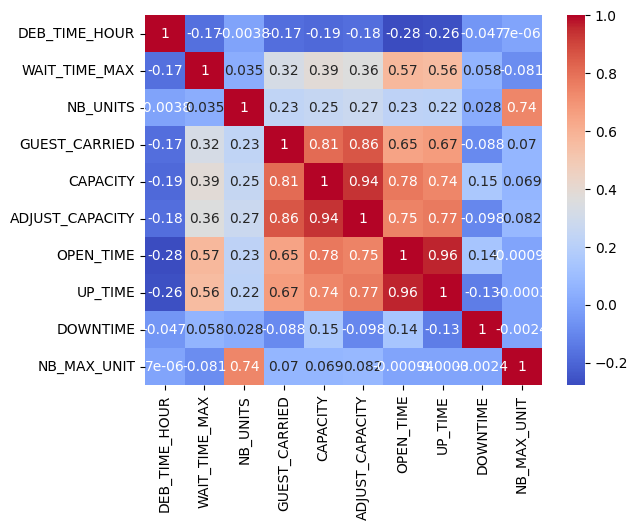

In [222]:
# Get the correlation matrix
corr = df_waiting_times.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

### Weather Data

In [310]:
weather_data = pd.read_csv(data_path+"weather_data.csv")
weather_data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,915148800,1999-01-01 00:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,...,NaN,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n
1,915152400,1999-01-01 01:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,3.54,5.18,...,NaN,NaN,NaN,NaN,NaN,6,800,Clear,sky is clear,01n
2,915156000,1999-01-01 02:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,4.11,5.38,...,NaN,NaN,NaN,NaN,NaN,14,801,Clouds,few clouds,02n
3,915159600,1999-01-01 03:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,7.31,NaN,3.73,4.42,...,NaN,NaN,NaN,NaN,NaN,39,802,Clouds,scattered clouds,03n
4,915163200,1999-01-01 04:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.91,NaN,3.53,4.00,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n


In [311]:
#Drop not needed columns
df_weather_data = weather_data.drop(['city_name', 'visibility', 'weather_id', 'sea_level', 'grnd_level', 'snow_3h'], axis=1)

In [312]:
#Drop before 2018
df_weather_data = df_weather_data[df_weather_data['dt_iso'] >= '2018-01-01']

In [313]:
# Convert dt_iso to datetime format
print(df_weather_data['dt_iso'].dtype)
df_weather_data['date'] = df_weather_data['dt_iso'].str[:10]
df_weather_data['time'] = df_weather_data['dt_iso'].str[11:19]
df_weather_data['date'] = pd.to_datetime(df_weather_data['date'])


object


In [314]:
df_weather_data['datetime'] = df_weather_data['date'].astype(str) + " " + df_weather_data['time'].astype(str)
df_weather_data['datetime'] = pd.to_datetime(df_weather_data['datetime'])

In [315]:
df_weather_data

,dt,dt_iso,timezone,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,...,rain_1h,rain_3h,snow_1h,clouds_all,weather_main,weather_description,weather_icon,date,time,datetime
166560,1514764800,2018-01-01 00:00:00 +0000 UTC,3600,48.873492,2.295104,8.94,4.56,5.21,7.70,9.60,...,NaN,NaN,NaN,23,Clouds,few clouds,02n,2018-01-01,00:00:00,2018-01-01 00:00:00
166561,1514768400,2018-01-01 01:00:00 +0000 UTC,3600,48.873492,2.295104,8.07,3.72,4.09,7.70,8.60,...,NaN,NaN,NaN,4,Clear,sky is clear,01n,2018-01-01,01:00:00,2018-01-01 01:00:00
166562,1514772000,2018-01-01 02:00:00 +0000 UTC,3600,48.873492,2.295104,7.76,3.42,3.81,7.31,7.94,...,NaN,NaN,NaN,27,Clouds,scattered clouds,03n,2018-01-01,02:00:00,2018-01-01 02:00:00
166563,1514775600,2018-01-01 03:00:00 +0000 UTC,3600,48.873492,2.295104,7.57,3.43,3.63,6.74,7.94,...,NaN,NaN,NaN,78,Clouds,broken clouds,04n,2018-01-01,03:00:00,2018-01-01 03:00:00
166564,1514779200,2018-01-01 04:00:00 +0000 UTC,3600,48.873492,2.295104,6.86,3.30,2.88,5.74,7.60,...,NaN,NaN,NaN,52,Clouds,broken clouds,04n,2018-01-01,04:00:00,2018-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207259,1661281200,2022-08-23 19:00:00 +0000 UTC,7200,48.873492,2.295104,24.89,18.34,25.18,23.74,25.86,...,NaN,NaN,NaN,100,Clouds,overcast clouds,04n,2022-08-23,19:00:00,2022-08-23 19:00:00
207260,1661284800,2022-08-23 20:00:00 +0000 UTC,7200,48.873492,2.295104,23.06,18.18,23.35,21.38,24.86,...,NaN,NaN,NaN,100,Clouds,overcast clouds,04n,2022-08-23,20:00:00,2022-08-23 20:00:00
207261,1661288400,2022-08-23 21:00:00 +0000 UTC,7200,48.873492,2.295104,21.83,18.42,22.18,19.71,23.86,...,NaN,NaN,NaN,100,Clouds,overcast clouds,04n,2022-08-23,21:00:00,2022-08-23 21:00:00
207262,1661292000,2022-08-23 22:00:00 +0000 UTC,7200,48.873492,2.295104,21.08,18.46,21.46,19.90,22.86,...,NaN,NaN,NaN,100,Clouds,overcast clouds,04n,2022-08-23,22:00:00,2022-08-23 22:00:00


In [316]:
df_weather_data = df_weather_data.drop(['date', 'time'], axis=1)
df_weather_data.head()

,dt,dt_iso,timezone,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,...,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,clouds_all,weather_main,weather_description,weather_icon,datetime
166560,1514764800,2018-01-01 00:00:00 +0000 UTC,3600,48.873492,2.295104,8.94,4.56,5.21,7.70,9.60,...,233,NaN,NaN,NaN,NaN,23,Clouds,few clouds,02n,2018-01-01 00:00:00
166561,1514768400,2018-01-01 01:00:00 +0000 UTC,3600,48.873492,2.295104,8.07,3.72,4.09,7.70,8.60,...,238,NaN,NaN,NaN,NaN,4,Clear,sky is clear,01n,2018-01-01 01:00:00
166562,1514772000,2018-01-01 02:00:00 +0000 UTC,3600,48.873492,2.295104,7.76,3.42,3.81,7.31,7.94,...,240,NaN,NaN,NaN,NaN,27,Clouds,scattered clouds,03n,2018-01-01 02:00:00
166563,1514775600,2018-01-01 03:00:00 +0000 UTC,3600,48.873492,2.295104,7.57,3.43,3.63,6.74,7.94,...,241,NaN,NaN,NaN,NaN,78,Clouds,broken clouds,04n,2018-01-01 03:00:00
166564,1514779200,2018-01-01 04:00:00 +0000 UTC,3600,48.873492,2.295104,6.86,3.30,2.88,5.74,7.60,...,237,NaN,NaN,NaN,NaN,52,Clouds,broken clouds,04n,2018-01-01 04:00:00


## Merge together

In [317]:
df_times_weather = df_waiting_times.merge(df_weather_data, left_on="DEB_TIME", right_on="datetime", how="left")
df_times_weather.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,clouds_all,weather_main,weather_description,weather_icon,datetime
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,272.0,NaN,NaN,NaN,NaN,39.0,Clouds,scattered clouds,03n,2018-01-01 21:00:00
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [319]:
df_times_weather = df_times_weather.rename(columns={'FIN_TIME':'FIN_TIME_Waiting_Times', 'DEB_TIME':'DEB_TIME_Waiting_Times'})

In [322]:
df_times_weather_parade = df_times_weather.merge(parade, how="left", on="WORK_DATE")

MemoryError: Unable to allocate 416. MiB for an array with shape (23, 2369821) and data type float64

In [288]:
df_att_ent = df_attendance.merge(df_entity_schedule, left_on="USAGE_DATE", right_on="WORK_DATE", how="left")
df_att_ent.head()

,USAGE_DATE,FACILITY_NAME,attendance,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,duration
0,2018-06-01,PortAventura World,46804,NaN,PortAventura World,PARK,2018-06-01 08:30:00,2018-06-01 09:30:00,2018-06-02 08:08:42.000,2018-06-01,0 days 01:00:00
1,2018-06-01,PortAventura World,46804,Fermeture Opérationnelle,Oz Theatre,ATTR,2018-06-01 23:59:00,2018-06-01 23:59:00,2018-06-02 08:08:14.000,2018-06-01,0 days 00:00:00
2,2018-06-01,PortAventura World,46804,NaN,Flying Coaster,ATTR,2018-06-01 10:00:00,2018-06-01 23:08:00,2018-06-02 08:08:12.000,2018-06-01,0 days 13:08:00
3,2018-06-01,PortAventura World,46804,NaN,Top Spin,ATTR,2018-06-01 10:45:00,2018-06-01 17:35:00,2018-06-02 08:08:25.000,2018-06-01,0 days 06:50:00
4,2018-06-01,PortAventura World,46804,NaN,Crazy Dance,ATTR,2018-06-01 09:31:00,2018-06-01 23:07:00,2018-06-02 08:08:12.000,2018-06-01,0 days 13:36:00


In [289]:
df_att_ent_par = df_att_ent.merge(parade, on="WORK_DATE", how="left")
df_att_ent_par.head()

,USAGE_DATE,FACILITY_NAME,attendance,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,duration,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-06-01,PortAventura World,46804,NaN,PortAventura World,PARK,2018-06-01 08:30:00,2018-06-01 09:30:00,2018-06-02 08:08:42.000,2018-06-01,0 days 01:00:00,NaN,NaN,NaN
1,2018-06-01,PortAventura World,46804,Fermeture Opérationnelle,Oz Theatre,ATTR,2018-06-01 23:59:00,2018-06-01 23:59:00,2018-06-02 08:08:14.000,2018-06-01,0 days 00:00:00,NaN,NaN,NaN
2,2018-06-01,PortAventura World,46804,NaN,Flying Coaster,ATTR,2018-06-01 10:00:00,2018-06-01 23:08:00,2018-06-02 08:08:12.000,2018-06-01,0 days 13:08:00,NaN,NaN,NaN
3,2018-06-01,PortAventura World,46804,NaN,Top Spin,ATTR,2018-06-01 10:45:00,2018-06-01 17:35:00,2018-06-02 08:08:25.000,2018-06-01,0 days 06:50:00,NaN,NaN,NaN
4,2018-06-01,PortAventura World,46804,NaN,Crazy Dance,ATTR,2018-06-01 09:31:00,2018-06-01 23:07:00,2018-06-02 08:08:12.000,2018-06-01,0 days 13:36:00,NaN,NaN,NaN


In [280]:
df_att_ent_par.head()

,USAGE_DATE,FACILITY_NAME,attendance,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,duration,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-10-01,PortAventura World,25133,NaN,Skyway,ATTR,2018-10-01 10:00:00,2018-10-01 18:10:00,2018-10-02 07:37:44.000,2018-10-01,0 days 08:10:00,20:00:00,17:30:00,12:10:00
1,2018-10-01,PortAventura World,25133,NaN,Water Ride,ATTR,2018-10-01 08:30:00,2018-10-01 19:08:00,2018-10-02 07:37:11.000,2018-10-01,0 days 10:38:00,20:00:00,17:30:00,12:10:00
2,2018-10-01,PortAventura World,25133,NaN,Haunted House,ATTR,2018-10-01 09:54:00,2018-10-01 18:45:00,2018-10-02 07:35:52.000,2018-10-01,0 days 08:51:00,20:00:00,17:30:00,12:10:00
3,2018-10-01,PortAventura World,25133,NaN,Go-Karts,ATTR,2018-10-01 08:30:00,2018-10-01 20:10:00,2018-10-02 07:36:55.000,2018-10-01,0 days 11:40:00,20:00:00,17:30:00,12:10:00
4,2018-10-01,PortAventura World,25133,NaN,Free Fall,ATTR,2018-10-01 10:00:00,2018-10-01 18:04:00,2018-10-02 07:37:35.000,2018-10-01,0 days 08:04:00,20:00:00,17:30:00,12:10:00


In [290]:
df_times_weather = df_waiting_times.merge(df_weather_data, left_on="DEB_TIME", right_on="datetime", how="left")
df_times_weather.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,weather_icon,datetime
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,39.0,Clouds,scattered clouds,03n,2018-01-01 21:00:00
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [292]:
df = pd.merge(df_times_weather, df_att_ent_par, on=['ENTITY_DESCRIPTION_SHORT', 'DEB_TIME'], how="left")

In [298]:
df = df.rename(columns={'WORK_DATE_x':'WORK_DATE_Waiting_Times', 'FIN_TIME_x':'FIN_TIME_Working_Hours', 'FIN_TIME_y':'FIN_TIME_y_entity_sch'})

In [300]:
df.to_csv(data_path+"date_merged.csv", index=False)

In [306]:
df['attendance'].isna().sum()

2365149

In [296]:
df_waiting_times.shape

(2369821, 15)